In [1]:
#Clustering

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

KM= KMeans(n_clusters=3, random_state=0)
irs=load_iris()
x=irs.data

X_train,X_test=train_test_split(x,random_state=0)

KM.fit(X_train)

y_pred=KM.predict(X_test)

center=KM.cluster_centers_

print(center)
print(y_pred)

[[4.9972973  3.38918919 1.45405405 0.24054054]
 [5.84390244 2.7097561  4.32926829 1.40731707]
 [6.90588235 3.09705882 5.70294118 2.07058824]]
[1 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
try:
    df = pd.read_csv("/content/housing.csv")
except FileNotFoundError:
    print("Error: The file was not found.")
    df = None

if df is not None:
    # Display the first few rows to understand its structure
    print("First few rows of the dataset:")
    print(df.head())

    # Display column names to verify
    print("Columns in dataset:", df.columns)

    # Display any missing values
    print("Missing values in each column:\n", df.isnull().sum())

    # Check if 'MEDV' column is in the dataset
    if 'MEDV' not in df.columns:
        print("Error: 'MEDV' column not found in the dataset")
    else:
        # Fill missing values with the mean of the respective columns
        for column in df.columns:
            if df[column].isnull().sum() > 0:
                df[column].fillna(df[column].mean(), inplace=True)

        # Split the data into features and target variable
        x = df.drop('MEDV', axis=1)
        y = df['MEDV']

        # Split the data into training and testing sets
        X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=1, test_size=0.2)

        # Initialize and train the linear regression model
        reg = LinearRegression()
        reg.fit(X_train, Y_train)

        # Make predictions on the test set
        y_pred = reg.predict(X_test)

        # Calculate mean squared error
        score = mean_squared_error(Y_test, y_pred)

        # Print the mean squared error
        print("Mean Squared Error:", score)
else:
    print("Dataset could not be loaded. Please check the file path and format.")


First few rows of the dataset:
   0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
0   0.02731   0.00   7.070  0  0.4690  6.4210  78...                                              
1   0.02729   0.00   7.070  0  0.4690  7.1850  61...                                              
2   0.03237   0.00   2.180  0  0.4580  6.9980  45...                                              
3   0.06905   0.00   2.180  0  0.4580  7.1470  54...                                              
4   0.02985   0.00   2.180  0  0.4580  6.4300  58...                                              
Columns in dataset: Index([' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00'], dtype='object')
Missing values in each column:
  0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00    0
dtype: int64
Error: 'MEDV' column not found in the dataset


First few rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Columns in dataset: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
Missing values in each column:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


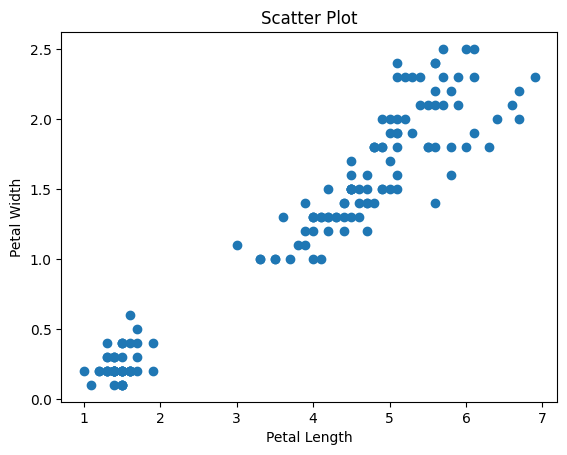

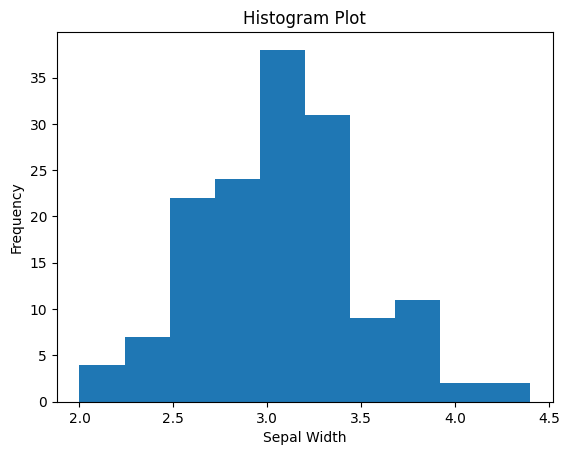

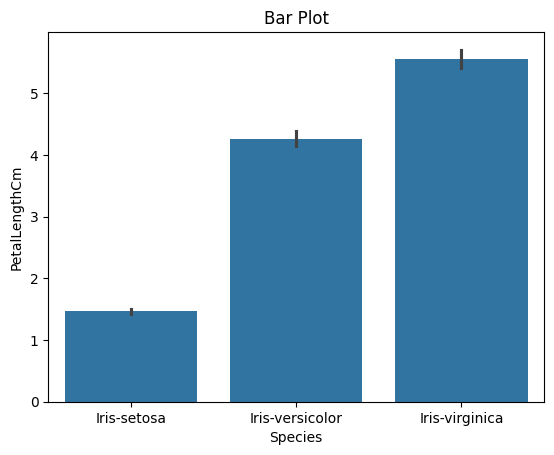

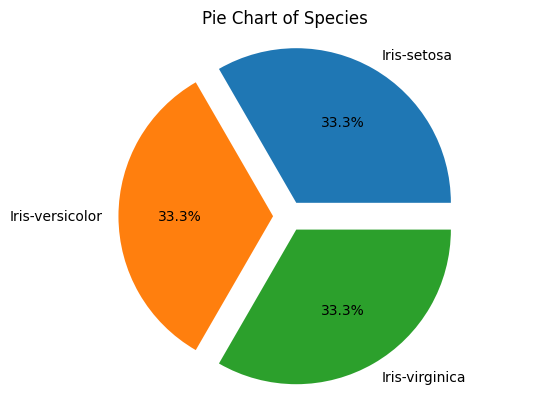

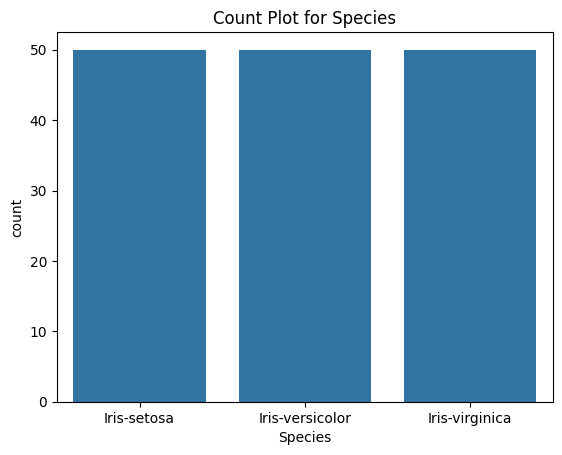

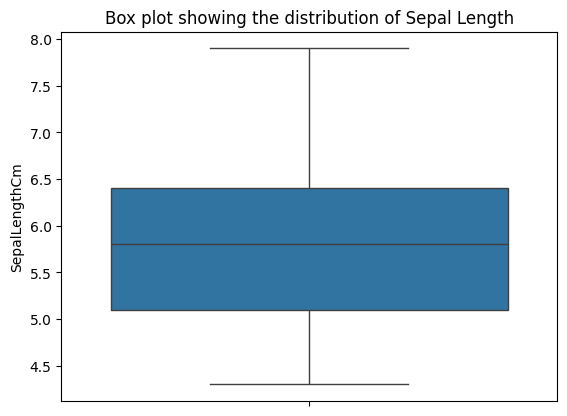

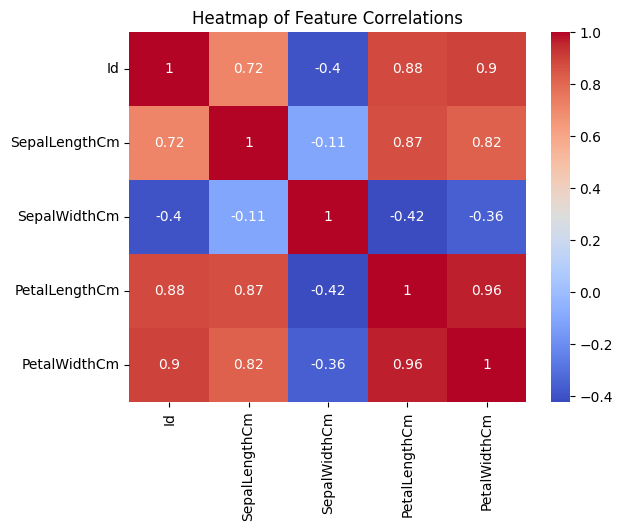

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Iris.csv")

# Display the first few rows to understand its structure
print("First few rows of the dataset:")
print(df.head())

# Display column names to verify
print("Columns in dataset:", df.columns)

# Display any missing values
print("Missing values in each column:\n", df.isnull().sum())

# Preparing X and Y
X = df.drop(['Id', 'Species'], axis=1)
Y = df['Species']

# Scatter Plot to find correlations between two continuous variables
plt.scatter(df["PetalLengthCm"], df["PetalWidthCm"])
plt.title("Scatter Plot")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

# Histogram shows the distribution of a continuous variable. It can discover the frequency distribution for a single variable in a univariate analysis.
plt.hist(df["SepalWidthCm"])
plt.title("Histogram Plot")
plt.xlabel("Sepal Width")
plt.ylabel("Frequency")
plt.show()

# Bar Chart or Bar Plot is used to represent categorical data with vertical or horizontal bars.
sns.barplot(x='Species', y='PetalLengthCm', data=df)
plt.title("Bar Plot")
plt.show()

# Pie Chart is a type of plot which is used to represent the proportion of each category in categorical data.
mylabels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
sizes = df['Species'].value_counts().tolist()  # dynamically get the counts of each species
plt.pie(sizes, labels=mylabels, explode=(0.1, 0.1, 0.1), autopct='%1.1f%%')
plt.axis('equal')
plt.title("Pie Chart of Species")
plt.show()

# Count Plot is similar to a bar plot except that we only pass the X-axis and Y-axis represents explicitly counting the number of occurrences. Each bar represents count for each category of species.
sns.countplot(x='Species', data=df)
plt.title("Count Plot for Species")
plt.show()

# Box Plot is used to show the distribution of a variable. The box plot is a standardized way of displaying the distribution of data based on the five-number summary: minimum, first quartile, median, third quartile, and maximum.
sns.boxplot(y='SepalLengthCm', data=df)
plt.title("Box plot showing the distribution of Sepal Length")
plt.show()

# Heatmap is a type of Matrix plot that allows you to plot data as color-encoded matrices. It is mostly used to find multi-collinearity in a dataset.
# Select only numeric columns for the heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap of Feature Correlations")
plt.show()
